**Задание 1**:
Используем файл keywords.csv.
 
Необходимо написать гео-классификатор, который каждой строке сможет выставить географическую принадлежность определенному региону. Т. е. если поисковый запрос содержит название города региона, то в столбце 'region' пишется название этого региона. Если поисковый запрос не содержит названия города, то ставим 'undefined'.
 
Правила распределения по регионам Центр, Северо-Запад и Дальний Восток:
 
geo_data = {
 
    'Центр': ['москва', 'тула', 'ярославль'],
 
    'Северо-Запад': ['петербург', 'псков', 'мурманск'],
 
    'Дальний Восток': ['владивосток', 'сахалин', 'хабаровск']
 
}
 
Результат классификации запишите в отдельный столбец region.

In [1]:
import pandas as pd

geo_data = {
'Центр': ['москва', 'тула', 'ярославль'],
'Северо-Запад': ['петербург', 'псков', 'мурманск'],
'Дальний Восток': ['владивосток', 'сахалин', 'хабаровск']
}

data = pd.read_csv('keywords.csv')

In [2]:
def region(row):
    for key, val in geo_data.items():
        for v in val:
            if v[0:-1] in row['keyword']: #важно! учитываем склонения: 'москва'[0:-1] = 'москв'
                return key

In [3]:
data['region'] = data.apply(region, axis = 1)
data[data['region'].isin(geo_data.keys())].head(10)

,keyword,shows,region
127,авито москва,979292,Центр
143,эхо москвы,889657,Центр
197,погода в москве,745745,Центр
370,авито ру санкт петербург,425134,Северо-Запад
414,погода в москве на 14 дней,400914,Центр
512,карта метро москвы,331857,Центр
564,погода в санкт петербурге,292489,Северо-Запад
584,схема метро москвы,374592,Центр
647,портал госуслуг москвы,263844,Центр
652,работа в москве,265000,Центр


In [4]:
data.groupby('region').count()

,keyword,shows
region,,
Дальний Восток,94,94
Северо-Запад,265,265
Центр,858,858


**Задание 2**:
Напишите функцию, которая классифицирует фильмы из материалов занятия по следующим правилам:
- оценка 2 и меньше - низкий рейтинг
- оценка 4 и меньше - средний рейтинг
- оценка 4.5 и 5 - высокий рейтинг
 
Результат классификации запишите в столбец class

In [30]:
ratings = pd.read_csv('ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556


In [31]:
def categorization(row):
    if row['rating'] <= 2:
        return 'низкий рейтинг'
    if row['rating'] <= 4 and row['rating'] > 2:
        return 'средний рейтинг' 
    if row['rating'] >= 4.5:
        return 'высокий рейтинг'

In [32]:
ratings['class'] = ratings.apply(categorization, axis = 1)
ratings.head(10)

,userId,movieId,rating,timestamp,class
0,1,110,1.0,1425941529,низкий рейтинг
1,1,147,4.5,1425942435,высокий рейтинг
2,1,858,5.0,1425941523,высокий рейтинг
3,1,1221,5.0,1425941546,высокий рейтинг
4,1,1246,5.0,1425941556,высокий рейтинг
5,1,1968,4.0,1425942148,средний рейтинг
6,1,2762,4.5,1425941300,высокий рейтинг
7,1,2918,5.0,1425941593,высокий рейтинг
8,1,2959,4.0,1425941601,средний рейтинг
9,1,4226,4.0,1425942228,средний рейтинг


**Задание 3**:
Посчитайте среднее значение Lifetime киноманов (пользователи, которые поставили 100 и более рейтингов). Под Lifetime понимается разница между максимальным и минимальным значением timestamp для каждого пользователя. Ответ дайте в днях.

In [10]:
time = pd.read_csv('ratings.csv')

lifetime = time.groupby('userId')['timestamp'].agg(['min', 'max'])

In [37]:
lifetime['lifetime'] = round(((lifetime['max'] - lifetime['min'])/60/60/24))
lifetime.sort_values(by='lifetime', ascending = False).head()

,min,max,lifetime
userId,,,
5765,918336932,1493212198,6654.0
4323,940925568,1501308148,6486.0
2531,940155792,1499220293,6471.0
4160,943036579,1501559808,6464.0
4219,949258083,1499381484,6367.0


**Задание 4**:
Есть мнение, что "раньше снимали настоящее кино, не то что сейчас". Ваша задача проверить это утверждение, используя файлы с рейтингами фильмов из материалов занятия. Т. е. проверить **верно ли, что с ростом года выпуска фильма его средний рейтинг становится ниже.**
 
При этом мы не будем затрагивать субьективные факторы выставления этих рейтингов, а пройдемся по следующему алгоритму:
 
1. В переменную years запишите список из всех годов с 1950 по 2010.
 
2. Напишите функцию production_year, которая каждой строке из названия фильма выставляет год выпуска. Не все названия фильмов содержат год выпуска в одинаковом формате, поэтому используйте следующий алгоритм:
- для каждой строки пройдите по всем годам списка years
- если номер года присутствует в названии фильма, то функция возвращает этот год как год выпуска
- если ни один из номеров года списка years не встретился в названии фильма, то возвращается 1900 год
 
3. Запишите год выпуска фильма по алгоритму пункта 2 в новый столбец 'year'
 
4. Посчитайте средний рейтинг всех фильмов для каждого значения столбца 'year' и отсортируйте результат по убыванию рейтинга

In [12]:
rates = pd.read_csv('ml-latest-small/ratings.csv')
movie = pd.read_csv('ml-latest-small/movies.csv')

In [13]:
rates.head(3)

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182


In [14]:
movie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [15]:
joined = rates.merge(movie, how = 'left', on = 'movieId')
joined.head()

,userId,movieId,rating,timestamp,title,genres
0,1,31,2.5,1260759144,Dangerous Minds (1995),Drama
1,1,1029,3.0,1260759179,Dumbo (1941),Animation|Children|Drama|Musical
2,1,1061,3.0,1260759182,Sleepers (1996),Thriller
3,1,1129,2.0,1260759185,Escape from New York (1981),Action|Adventure|Sci-Fi|Thriller
4,1,1172,4.0,1260759205,Cinema Paradiso (Nuovo cinema Paradiso) (1989),Drama


In [16]:
def years(row):
    for i in range(1950,2011):
        if str(i) in row['title']:
            return i

In [17]:
joined['year'] = joined.apply(years, axis =1)
joined.head()

,userId,movieId,rating,timestamp,title,genres,year
0,1,31,2.5,1260759144,Dangerous Minds (1995),Drama,1995.0
1,1,1029,3.0,1260759179,Dumbo (1941),Animation|Children|Drama|Musical,NaN
2,1,1061,3.0,1260759182,Sleepers (1996),Thriller,1996.0
3,1,1129,2.0,1260759185,Escape from New York (1981),Action|Adventure|Sci-Fi|Thriller,1981.0
4,1,1172,4.0,1260759205,Cinema Paradiso (Nuovo cinema Paradiso) (1989),Drama,1989.0


In [28]:
middle_rating = joined.groupby('year')['rating'].mean()
middle_rating.sort_values().head(61)

year
2000.0    3.356104
1997.0    3.415764
1996.0    3.426600
2003.0    3.444777
2005.0    3.448434
1990.0    3.449169
2002.0    3.456297
2001.0    3.460052
1992.0    3.466754
1999.0    3.471692
1995.0    3.472118
1998.0    3.472754
2004.0    3.491490
2008.0    3.498057
2006.0    3.511478
2009.0    3.520378
1986.0    3.528265
1989.0    3.534349
1993.0    3.536664
2010.0    3.537157
1994.0    3.537963
2007.0    3.548538
1978.0    3.549003
1988.0    3.552990
1985.0    3.588998
1987.0    3.606015
1956.0    3.617647
1991.0    3.628265
1982.0    3.638306
1984.0    3.651486
            ...   
1961.0    3.663851
1965.0    3.678715
1970.0    3.700000
1963.0    3.705966
1980.0    3.708816
1966.0    3.736726
1968.0    3.737844
1971.0    3.748830
1955.0    3.751724
1953.0    3.754587
1981.0    3.758763
1979.0    3.777966
1973.0    3.806667
1976.0    3.806794
1960.0    3.809211
1967.0    3.814516
1969.0    3.817376
1975.0    3.823077
1958.0    3.823171
1959.0    3.841033
1964.0    3.841492
1977.0 

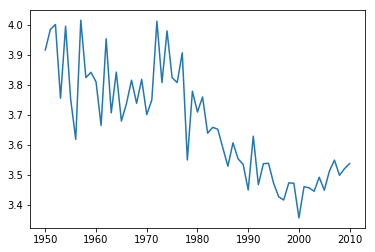

In [29]:
import matplotlib.pyplot as plt

plt.plot(middle_rating)